Assigment Steps:
- Download file "Dataset"
- Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)
- Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")
- Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

# 1. Data Preprocessing

## Modules Preparation

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

## Import Dataset

In [2]:
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/mini-projects/6-investigate-hotel-business-using-data-visualization/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,NaN,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,NaN,0,Personal,98,0,1,Check-Out


## Data Exploration

In [3]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (119390, 29)
Number of rows : 119390
Number of columns : 29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Checking Value from each feature
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

**Observations:**

- Features contain "**Undefined**" values : `meal`, `market_segment`, and `distribution_channel`.
- `company` and `agent` features have numeric value, possibly refer to id of each `company` and `agent`.
- `children`, `agent`, `company` are using 'float64' data type but don't have a decimal value.

## Handling Missing Value

In [6]:
print('Missing value status: ', df.isnull().values.any())
print()
print(df.isnull().sum())

Missing value status:  True

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list        

In [7]:
#Persentase Null tiap kolom
round(df.isnull().sum()/df.shape[0],5)

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_weekdays_nights             0
adults                               0
children                         0.000
babies                               0
meal                                 0
city                             0.004
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
deposit_type                         0
agent                            0.137
company                          0.943
days_in_waiting_list                 0
customer_type                        0
adr                      

**Observations:**

- Features that have 'Null' values : `children`, `city`, `agent`, `company`.
- `children` feature contains measly 'Null' values. Can be filled with '0'.
- `company` feature contains numerous 'Null' values. Can be filled with '0'.
- 'Null' value from `agent` feature can be filled with '0' (not from agent).
- 'Null' value from `city` feature decided to be dropped.

In [8]:
# Treatment

df['children'] = df['children'].fillna(0)
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df.dropna(subset=['city'],inplace=True)

In [9]:
print('Amount null values left: ', df.isnull().sum().sum())


Amount null values left:  0


## Checking Duplicated data

In [10]:
print('Amount duplicated data: ',df.duplicated().sum())

Amount duplicated data:  33223


In [11]:
# Drop duplicate data
# df_clean.drop_duplicates(keep='first', inplace=True)

Duplicated data will no be dropped due **no unique index/id**

In [12]:
# Checking dataset after 'Null' treatment

print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Number of rows : 118902
Number of columns : 29


## Fixing Data Type 

In [13]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

print('children: ', df['children'].dtypes)
print('agent: ', df['agent'].dtypes)
print('company: ', df['company'].dtypes)

children:  int64
agent:  int64
company:  int64


## Handling Unnecessary Data & Creating New Column

In [14]:
# Handling 'meal' feature

df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     91867
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64

In [15]:
# Creating 'total_guests' feature
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Dropping 'adults', 'children', 'babies' features
df.drop(columns=['adults','children','babies'], inplace=True)

#Column check
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,0,0,Personal,0,0,0,Check-Out,2


In [16]:
# Creating 'stay_duration' feature
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

#Column check
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
118483,City Hotel,0,250,2019,October,33,17,1,3,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,2,No Deposit,9,0,0,Personal,148.280,0,1,Check-Out,3,4


In [17]:
# Filtering 0 guest and 0 stay duration

print("Number of rows before removal :", df.shape[0])
df = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]
print("Number of rows after removal:", df.shape[0])

Number of rows before removal : 118902
Number of rows after removal: 118092


In [18]:
df.isnull().sum().sum()

0

## Statistical Analysis

In [19]:
#Separate numeric and string data type 
nums = []
cats = []

for i in df.columns :
    if df[i].dtypes == 'object':
        cats.append(i)
    else :
        nums.append(i)

In [20]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118092,0.374,0.484,0,0,0,1,1
lead_time,118092,104.793,106.954,0,19,70,161,709
arrival_date_year,118092,2018.159,0.708,2017,2018,2018,2019,2019
arrival_date_week_number,118092,27.159,13.575,1,16,28,38,53
arrival_date_day_of_month,118092,15.802,8.782,1,8,16,23,31
stays_in_weekend_nights,118092,0.933,0.993,0,0,1,2,16
stays_in_weekdays_nights,118092,2.514,1.885,0,1,2,3,40
is_repeated_guest,118092,0.030,0.169,0,0,0,0,1
previous_cancellations,118092,0.088,0.849,0,0,0,0,26
previous_bookings_not_canceled,118092,0.132,1.488,0,0,0,0,72


**Observations:**
- 'adr' (Average Daily Rate) feature has negative values which is an anomaly, hence value drop is necessary.

In [21]:
# Filtering adr feature (adr > 0)
df = df[df['adr']>0]

In [22]:
df[cats].describe().T

,count,unique,top,freq
hotel,116932,2,City Hotel,78076
arrival_date_month,116932,12,October,13686
meal,116932,4,Breakfast,90373
city,116932,177,Kota Denpasar,47027
market_segment,116932,8,Online TA,56016
distribution_channel,116932,5,TA/TO,96752
deposit_type,116932,3,No Deposit,102197
customer_type,116932,4,Personal,87715
reservation_status,116932,3,Check-Out,72978


# 2. Monthly Hotel Booking Analysis Based on Hotel Type

In [23]:
# Just in case, so data won't change while doing the analysis

df2 = df.copy()
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2


## Task 1

Create an aggregate table showing a comparison of the number of hotel orders by each month based on the type of hotel (Hint: Pay attention to arrival date data)

In [24]:
df_agg1 = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_agg1.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df_agg1

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4873
1,City Hotel,August,2,7814
2,City Hotel,December,2,7453
3,City Hotel,February,2,4006
4,City Hotel,January,2,4258
5,City Hotel,July,2,8118
6,City Hotel,June,2,7405
7,City Hotel,March,2,3670
8,City Hotel,May,2,6365
9,City Hotel,November,2,7280


## Task 2

Do data normalize above (Hint: Pay attention to month September and October)

In [25]:
# Calculating average number of booking per month in every year 
df_agg1['avg_mnt_booking'] = round(df_agg1['total_booking'] / df_agg1['unique_year'],3)
df_agg1

,hotel_type,arrival_month,unique_year,total_booking,avg_mnt_booking
0,City Hotel,April,2,4873,2436.500
1,City Hotel,August,2,7814,3907
2,City Hotel,December,2,7453,3726.500
3,City Hotel,February,2,4006,2003
4,City Hotel,January,2,4258,2129
5,City Hotel,July,2,8118,4059
6,City Hotel,June,2,7405,3702.500
7,City Hotel,March,2,3670,1835
8,City Hotel,May,2,6365,3182.500
9,City Hotel,November,2,7280,3640


## Task 3

Sort the data by month (Hint: Pay attention to writing the month name to make visualization easier)

In [26]:
## Step 1

# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# df_agg1['month'] = df_agg1['arrival_month'].str[:3]
# df_agg1['month'] = pd.Categorical(df_agg1['month'], categories=months)
# df_agg1.sort_values('month')

## Step 2

months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

df_agg1['arrival_month'] = pd.Categorical(df_agg1['arrival_month'], categories=months, ordered=True)
df_agg1_sort = df_agg1.sort_values(['hotel_type','arrival_month'])
df_agg1_sort



,hotel_type,arrival_month,unique_year,total_booking,avg_mnt_booking
4,City Hotel,January,2,4258,2129
3,City Hotel,February,2,4006,2003
7,City Hotel,March,2,3670,1835
0,City Hotel,April,2,4873,2436.500
8,City Hotel,May,2,6365,3182.500
6,City Hotel,June,2,7405,3702.500
5,City Hotel,July,2,8118,4059
1,City Hotel,August,2,7814,3907
11,City Hotel,September,3,7976,2658.667
10,City Hotel,October,3,8858,2952.667


## Task 4

Make a plot that can show changes in the increase or decrease of the number of hotel bookings each month based on the type of hotel (Hint: Pay attention to the type of plot used)

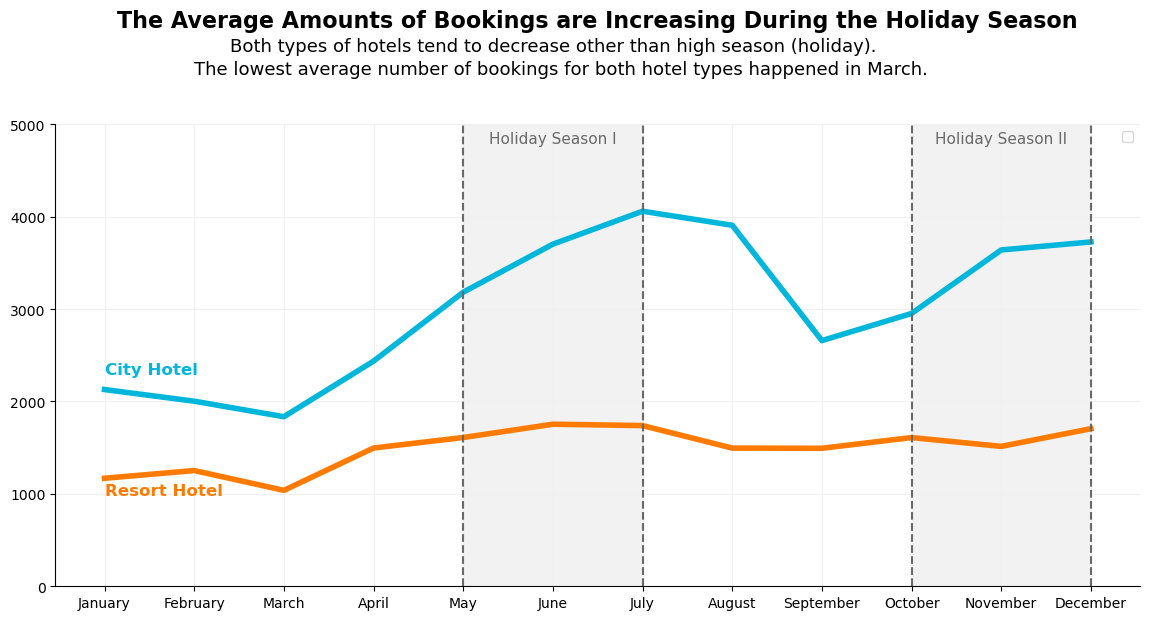

In [27]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# Creating a Plot
sns.lineplot(x='arrival_month', y='avg_mnt_booking', hue='hotel_type', data=df_agg1_sort, palette=['#00b7db', '#ff7b00'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)

# -----------------------------------------------------------------------------------------------------------------------------
# Adjusting Label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#00b7db', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#ff7b00', ha='left', fontweight='bold')

# -----------------------------------------------------------------------------------------------------------------------------
# Adding Title and Description
judul = 'The Average Amounts of Bookings are Increasing During the Holiday Season'
isi1 = 'Both types of hotels tend to decrease other than high season (holiday).'
isi2 = 'The lowest average number of bookings for both hotel types happened in March.'

plt.title(judul, fontsize=16, pad=70, loc='center',fontweight='bold')
plt.text(y = 5850, x = 1.4, s = isi1, ha='left', va='center', size=13)
plt.text(y = 5600, x = 1, s = isi2, ha='left', va='center', size=13)

# -----------------------------------------------------------------------------------------------------------------------------
#set holiday season I
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='dimgrey', ha='center')

plt.axvline(4, ls='--', color='dimgrey')
plt.axvline(6, ls='--', color='dimgrey')

#set holiday season
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='dimgrey', ha='center')

plt.axvline(9, ls='--', color='dimgrey')
plt.axvline(11, ls='--', color='dimgrey')

## Task 5

Write down the interpretation of the plot in the precious step (Hint: Pay Attention to holidays in Indonesia)

**Observations:**

- Both types of hotels were increasing during the holiday season (Holiday Season I: Ramadhan & Eid Fitr Season, Holiday Season II: Christmas & New Year Season).
- City Hotel have more average amount of bookings than Resort Hotel.
- The lowest number of bookings for both types were happened in March and a significant decrease of bookings for City Hotel happened in September, most possibly due to towards the end of the semester for students.
- Resort Hotel tends less significant decrease in the non_holiday season.

# 3. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [28]:
df3 = df.copy()
df3.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
38642,Resort Hotel,0,192,2019,September,30,23,2,0,Breakfast,Kabupaten Magelang,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,155.520,0,2,Check-Out,2,2


## Task 1

Create a new plot containing the total length of stay. (Hint: Pay attention to the columns containing information about lenght of stay)

> The task was done on "Handling Unnecessary Data & Creating New Column" section. [Check here](#Handling-Unnecessary-Data-&-Creating-New-Column)

## Task 2

Group the values from the new column in the previous step to them more significant (Hint: Pay attention to the distribution of the data)

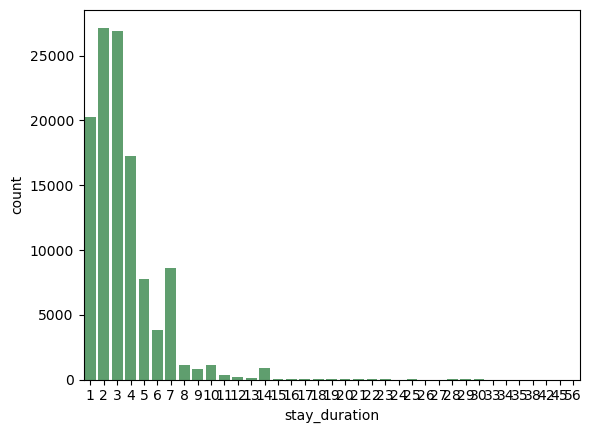

In [29]:
#sns.histplot(data=df3, x='stay_duration', binwidth=1)
sns.countplot(data=df3, x='stay_duration', color='g');

**Observations:**

- The "stay_duration" distribution data is right skewed

> Data in "Stay_duration" column that have more than 14, will be grouped into 15.

In [30]:
df3['stay_duration'] = np.where(df3['stay_duration']>14, 15, df3['stay_duration'])
df3['stay_duration'].value_counts().sort_index()

1     20256
2     27164
3     26883
4     17290
5      7736
6      3826
7      8601
8      1144
9       829
10     1128
11      391
12      218
13      138
14      907
15      421
Name: stay_duration, dtype: int64

> Changing a tick number '15' to '>14'

([<matplotlib.axis.XTick at 0x24229df0310>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '>14')])

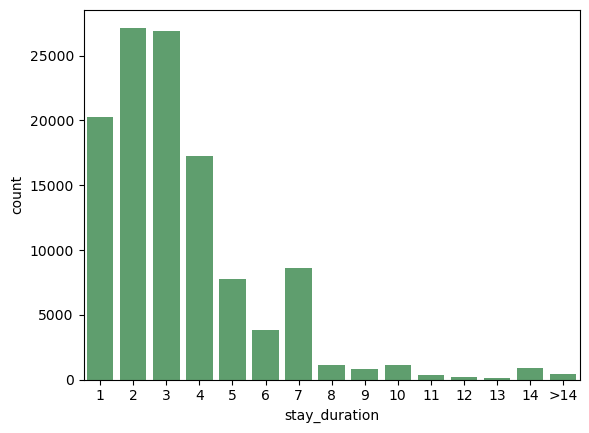

In [31]:
# Check the distribution
sns.countplot(data=df3, x='stay_duration', color='g')
plt.xticks(range(0,15,1), labels=[str(x) for x in range(1,15,1)]+['>14'])

## Task 3

Make an aggregation table that shows the ratio of the number of canceled hotel bookings to the duration of stay for each type of hotel (Hint: Pay attention to the proportion of canceled bookings)

In [32]:
### Aggregation with count
df3_agg = df3.groupby(['hotel','is_canceled','stay_duration']).agg({'stay_duration':'count'}).rename(columns={'stay_duration':'mnt_booking'}).reset_index()

### Create a pivot table
df3_agg_piv = pd.pivot_table(df3_agg,index=['hotel','stay_duration'], columns='is_canceled', values='mnt_booking').reset_index()

### Add a 'canceled' percentage column
df3_agg_piv['canceled_percentage'] = df3_agg_piv[1] / (df3_agg_piv[1] + df3_agg_piv[0]) * 100
df3_agg_piv.columns = ['hotel','stay_duration','non_canceled','canceled','canceled_percentage']
df3_agg_piv

,hotel,stay_duration,non_canceled,canceled,canceled_percentage
0,City Hotel,1,8781,4050,31.564
1,City Hotel,2,10766,10410,49.159
2,City Hotel,3,11807,9458,44.477
3,City Hotel,4,7669,4845,38.717
4,City Hotel,5,3203,1775,35.657
5,City Hotel,6,1108,938,45.846
6,City Hotel,7,1243,808,39.395
7,City Hotel,8,205,176,46.194
8,City Hotel,9,116,93,44.498
9,City Hotel,10,80,116,59.184


## Task 4

Make a plot that shows the ratio of order cancellations to the duration of stay for each type of hotel (Hint: Pay attention to type of plot used)

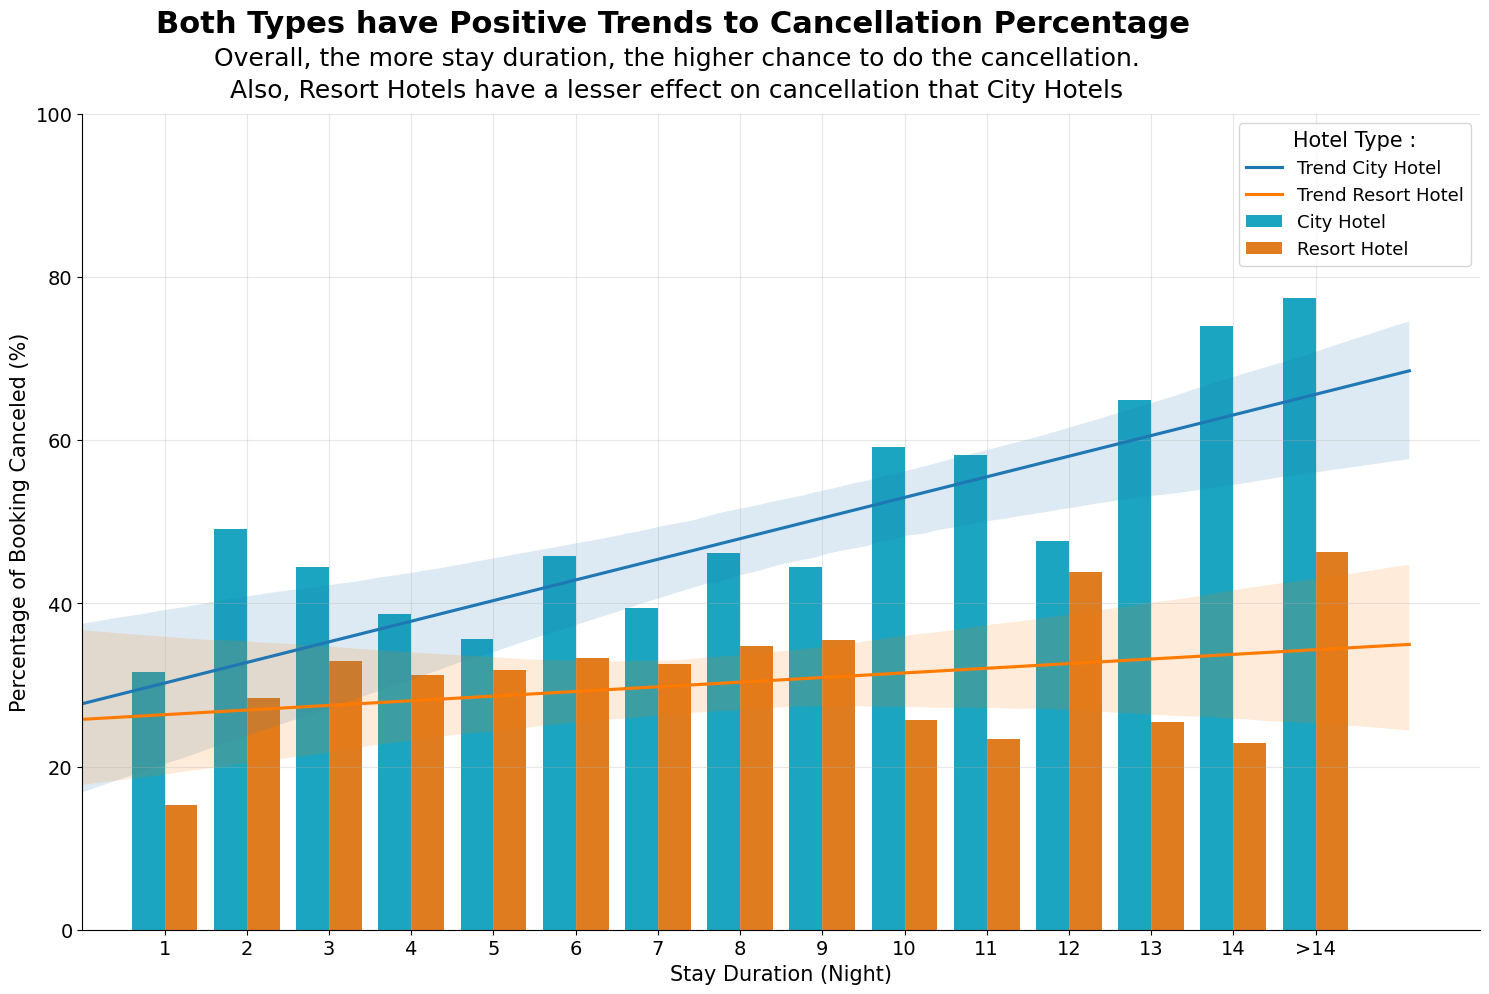

In [33]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# Creating a Plot
sns.barplot(x='stay_duration', y='canceled_percentage', hue='hotel', data=df3_agg_piv, palette= ['#00b7db', '#ff7b00'])
sns.regplot(x='stay_duration', y='canceled_percentage', data=df3_agg_piv[df3_agg_piv['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x='stay_duration', y='canceled_percentage', data=df3_agg_piv[df3_agg_piv['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color='#ff7b00', truncate=False)

# -----------------------------------------------------------------------------------------------------------------------------
# Adjusting Labels, ticks, and grids
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.xticks(range(0,15,1), labels=[str(x) for x in range(1,15,1)]+['>14'])
plt.xlabel('Stay Duration (Night)', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend(title='Hotel Type :', title_fontsize=15, prop={'size':13})

# -----------------------------------------------------------------------------------------------------------------------------
# Setting Limit
plt.ylim(0, 100)
plt.xlim(-1, 16)

# -----------------------------------------------------------------------------------------------------------------------------
# Adding Title and Description
judul = 'Both Types have Positive Trends to Cancellation Percentage '
isi1 = 'Overall, the more stay duration, the higher chance to do the cancellation.'
isi2 = 'Also, Resort Hotels have a lesser effect on cancellation that City Hotels'
plt.text(x=-0.1, y=110, s=judul, fontsize=22, fontweight='bold')
plt.text(x=0.6, y=106, s=isi1, fontsize=18)
plt.text(x=0.8, y=102, s=isi2, fontsize=18)

plt.tight_layout()

## Task 5

Write down the interpretation of the plot in the precious step (Hint: Pay attention to the effect of the duration of stay on the cancellation rate of hotel bookings)

**Observations:**

- The positive trends on both types indicate that The longer the stay duration that customers ordered, the higher chance the customers do the cancellation for both hotel types.
- The Resort Hotel has a lesser chance of cancellation against stay duration than the City Hotel.

# 4. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [34]:
df4 = df.copy()
df4.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
27464,Resort Hotel,0,116,2018,October,35,27,2,1,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,171,0,2,Check-Out,2,3


<Axes: xlabel='lead_time', ylabel='Count'>

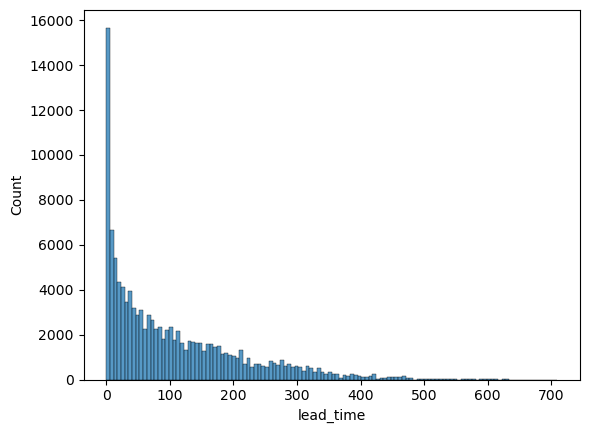

In [35]:
sns.histplot(df4['lead_time'])

In [36]:
# Checking lead_time values

uniq = df4['lead_time'].nunique()
maxv = df4['lead_time'].max()
minv = df4['lead_time'].min()

print('Unique value:', uniq)
print('Max duration:', maxv)
print('Min duration:', minv)

Unique value: 478
Max duration: 709
Min duration: 0


## Task 1

Create a new column that contains the categorization of the ordering time interval column (Hint: Pay attention to the intervals in making categorization)

In [37]:
df4['lead_time_category'] = np.where((df4['lead_time']) < 31, 1,
                        np.where((df4['lead_time']) <= 61, 2,
                        np.where((df4['lead_time']) <= 91, 3, 
                        np.where((df4['lead_time']) <= 121, 4,
                        np.where((df4['lead_time']) <= 151, 5,
                        np.where((df4['lead_time']) <= 181, 6,
                        np.where((df4['lead_time']) <= 211, 7, 
                        np.where((df4['lead_time']) <= 241, 8,
                        np.where((df4['lead_time']) <= 271, 9,
                        np.where((df4['lead_time']) <= 301, 10, 
                        np.where((df4['lead_time']) <= 331, 11,
                        np.where((df4['lead_time']) <= 361, 12, 13))))))))))))

If values were more than 361, I moved that to 13 which means more than 12 month.

In [38]:
# Checking new column
df4['lead_time_category'].value_counts().sort_index()

1     36880
2     17302
3     12288
4     10303
5      8199
6      7739
7      5569
8      4155
9      3343
10     3509
11     2566
12     1692
13     3387
Name: lead_time_category, dtype: int64

## Task 2

Make an aggregate table showing the ratio of the number of canceled hotel bookings to the time interval of bookings for each type of hotel (Hint: Pay attention to the proportion of canceled bookings)

In [65]:
# Aggregation
rename = {'stay_duration':'mnt_bookings'}
df4_agg = df4.groupby(['hotel','lead_time_category']).agg({'is_canceled' : 'sum', 'stay_duration' : 'count'}).rename(columns=rename).reset_index()
df4_agg['lead_cancel_ratio'] = 100*((df4_agg['is_canceled']) / df4_agg['mnt_bookings'])

# Sorting lead_time_category column
tick = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
df4_agg['lead_time_category'] = pd.Categorical(df4_agg['lead_time_category'], categories = tick)
df4_agg = df4_agg.sort_values('lead_time_category')
df4_agg

,hotel,lead_time_category,is_canceled,mnt_bookings,lead_cancel_ratio
0,City Hotel,1,5111,22400,22.817
13,Resort Hotel,1,1920,14480,13.260
1,City Hotel,2,4793,12179,39.355
14,Resort Hotel,2,1587,5123,30.978
2,City Hotel,3,3593,8724,41.185
15,Resort Hotel,3,1267,3564,35.550
3,City Hotel,4,3464,7347,47.148
16,Resort Hotel,4,1156,2956,39.107
4,City Hotel,5,2570,5682,45.231
17,Resort Hotel,5,1036,2517,41.160


## Taks 3

Make a plot that can show the ratio of order cancellations to the time between bookings for each type of hotel (Hint: Pay attention to the type of plot used)

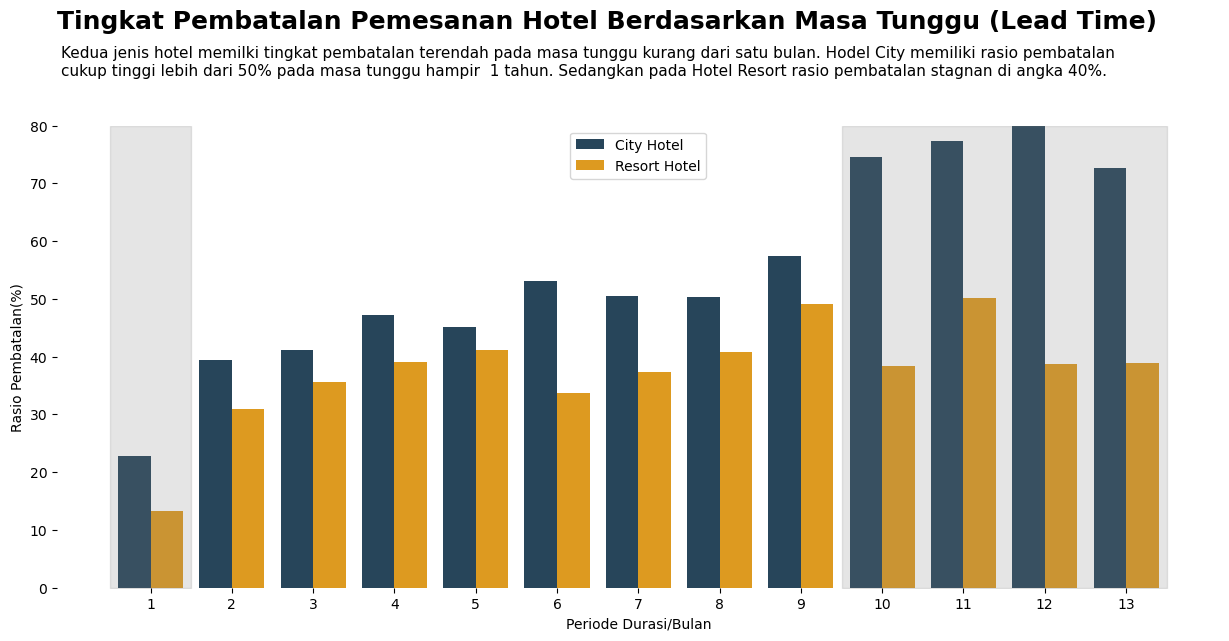

In [68]:
# membuat visualisasi data
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = df4_agg['lead_time_category'], y = df4_agg['lead_cancel_ratio'], hue=df4_agg['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f4762', '#fda300'])
plt.ylim(0,80)

# -----------------------------------------------------------------------------------------------------------
# mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu (Lead Time)', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Kedua jenis hotel memilki tingkat pembatalan terendah pada masa tunggu kurang dari satu bulan. Hodel City memiliki rasio pembatalan \ncukup tinggi lebih dari 50% pada masa tunggu hampir  1 tahun. Sedangkan pada Hotel Resort rasio pembatalan stagnan di angka 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

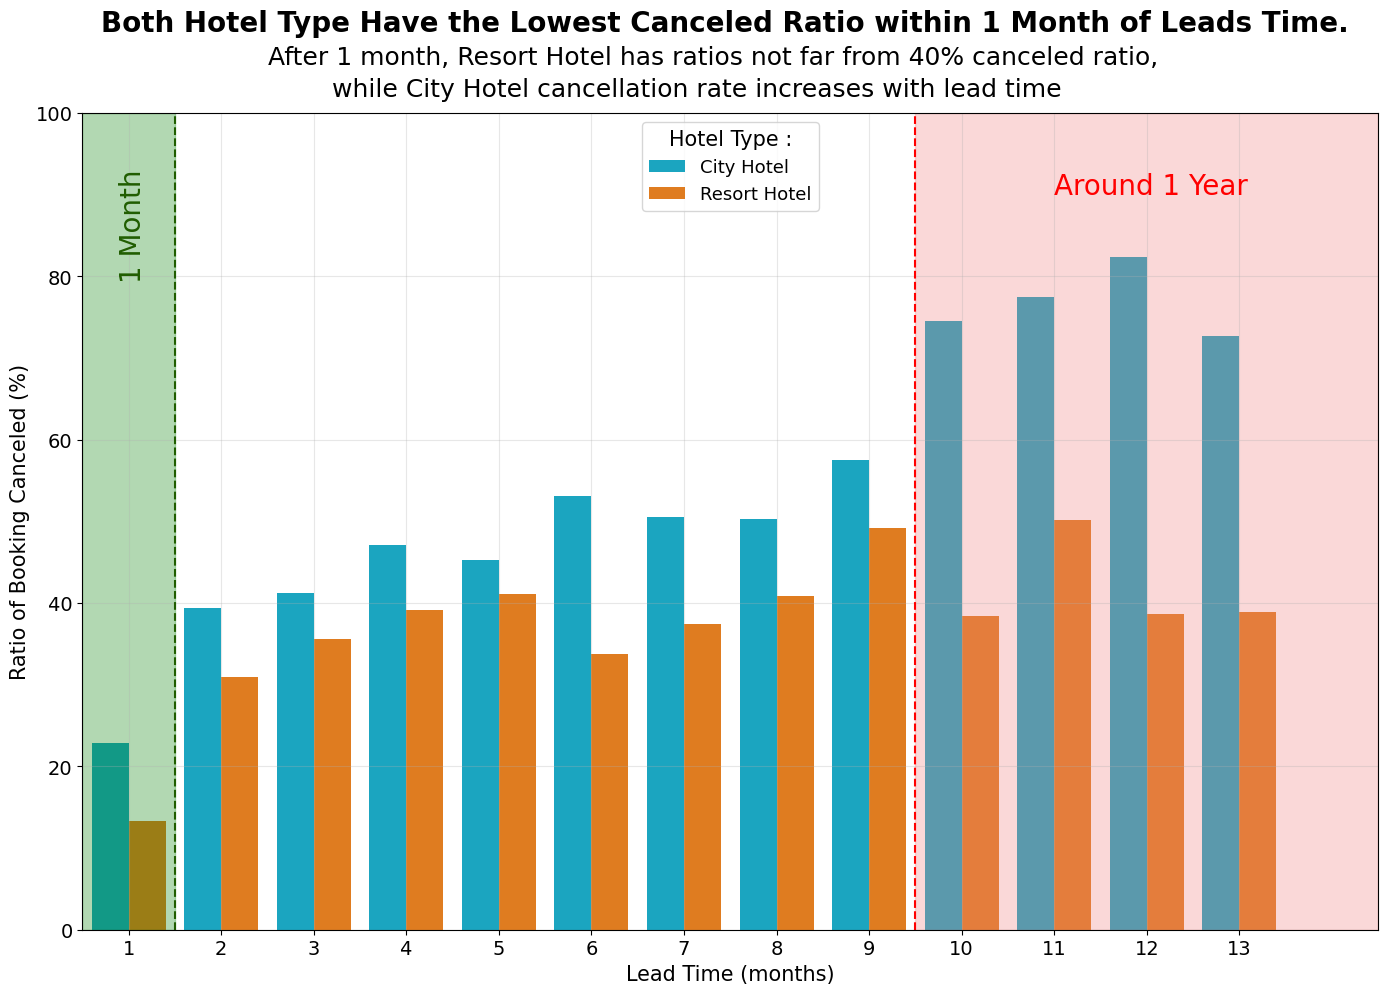

In [95]:
plt.figure(figsize=(15,10))

# -----------------------------------------------------------------------------------------------------------------------------
# Creating a plot
sns.barplot(x='lead_time_category', y='lead_cancel_ratio', hue='hotel', data=df4_agg, palette= ['#00b7db', '#ff7b00'])

# -----------------------------------------------------------------------------------------------------------------------------
# Adjusting Labels, ticks, and grids
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.xlabel('Lead Time (months)', fontsize=15)
plt.ylabel('Ratio of Booking Canceled (%)', fontsize=15)

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend(title='Hotel Type :', title_fontsize=15, prop={'size':13}, loc='upper center')

# -----------------------------------------------------------------------------------------------------------------------------
# Setting Limit
plt.ylim(0,100)
plt.xlim(-0.5,13.5)

# -----------------------------------------------------------------------------------------------------------------------------
# Setting Line Area
plt.axvline(0.5, ls='--', color='#205d00')
plt.stackplot(np.arange(-0.5,1.5,1),[[100]], color='green', alpha=0.3)
plt.text(x=-0.1, y=80, s='1 Month', fontsize=20, color='#205d00', rotation=90)

plt.axvline(8.5, ls='--', color='red')
plt.stackplot(np.arange(8.5,14.5,1),[[100]], color='lightcoral', alpha=0.3)
plt.text(x=10, y=90, s='Around 1 Year', fontsize=20, color='red')

# -----------------------------------------------------------------------------------------------------------------------------
# Adding Title and Description
plt.text(x=-0.3, y=110, s='Both Hotel Type Have the Lowest Canceled Ratio within 1 Month of Leads Time.', fontsize=20, fontweight='bold')
plt.text(x=1.5, y=106, s='After 1 month, Resort Hotel has ratios not far from 40% canceled ratio,', fontsize=18)
plt.text(x=2.2, y=102, s='while City Hotel cancellation rate increases with lead time', fontsize=18)

plt.tight_layout()

## Task 4

Write down the interpretation of the plot results in the previous step (Hint: Pay attention to the effect of time intervals)

**Observations:**

- Overall, both hotel types' cancellation rates were affected by customers' lead time.
- The lowest cancellation rate by lead time for both types happened in the first month.
- City Hotel has a significant increment in cancellation rates in more than 10 months of lead time.
- Resort Hotel cancellation rates by lead time are more stable than City Hotel.